In [108]:
import pandas as pd
import seaborn as sns

## About the Data


There is a total of 8 different prompts in the dataset. The following are the prompts and the number of responses for each prompt:
```
- EssaySet 1 count: 1783 and type of essay persuasive / narrative  / expository
- EssaySet 2 count : 1800 and type of essay persuasive / narrative  / expository
- EssaySet 3 count : 1726 and type of essay source dependent responses
- EssaySet 4 count : 1772 and type of essay source dependent responses
- EssaySet 5 count : 1805 and type of essay source dependent responses
- EssaySet 6 count : 1800 and type of essay source dependent responses
- EssaySet 7 count : 1569 and type of essay persuasive / narrative  / expository
- EssaySet 8 count : 723 and type of essay persuasive / narrative  / expository

```

## Training Set

#### Importing Data

In [109]:
df_train = pd.read_csv ("../raw_data/training_set_rel3.tsv", sep = "\t", encoding = "ISO-8859-1")


In [110]:
df_train.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12976 entries, 0 to 12975
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        12976 non-null  int64  
 1   essay_set       12976 non-null  int64  
 2   essay           12976 non-null  object 
 3   rater1_domain1  12976 non-null  int64  
 4   rater2_domain1  12976 non-null  int64  
 5   rater3_domain1  128 non-null    float64
 6   domain1_score   12976 non-null  int64  
 7   rater1_domain2  1800 non-null   float64
 8   rater2_domain2  1800 non-null   float64
 9   domain2_score   1800 non-null   float64
 10  rater1_trait1   2292 non-null   float64
 11  rater1_trait2   2292 non-null   float64
 12  rater1_trait3   2292 non-null   float64
 13  rater1_trait4   2292 non-null   float64
 14  rater1_trait5   723 non-null    float64
 15  rater1_trait6   723 non-null    float64
 16  rater2_trait1   2292 non-null   float64
 17  rater2_trait2   2292 non-null  

It appears that we have about 12,975,000 rows of data and 27 columns. 

In [112]:
df_train.isna().sum()

essay_id              0
essay_set             0
essay                 0
rater1_domain1        0
rater2_domain1        0
rater3_domain1    12848
domain1_score         0
rater1_domain2    11176
rater2_domain2    11176
domain2_score     11176
rater1_trait1     10684
rater1_trait2     10684
rater1_trait3     10684
rater1_trait4     10684
rater1_trait5     12253
rater1_trait6     12253
rater2_trait1     10684
rater2_trait2     10684
rater2_trait3     10684
rater2_trait4     10684
rater2_trait5     12253
rater2_trait6     12253
rater3_trait1     12848
rater3_trait2     12848
rater3_trait3     12848
rater3_trait4     12848
rater3_trait5     12848
rater3_trait6     12848
dtype: int64

We see that there is a lot of missing data in the dataset. We will have to deal with this later on. We also see that there are some columns that are not relevant for our analysis. We will drop these columns later on as well.

In [113]:
df_train.dropna(axis=1, inplace=True)
df_train.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",4,4,8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,10
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,8


In [114]:
df_train.shape

(12976, 6)

Text(0, 0.5, 'Number of essays')

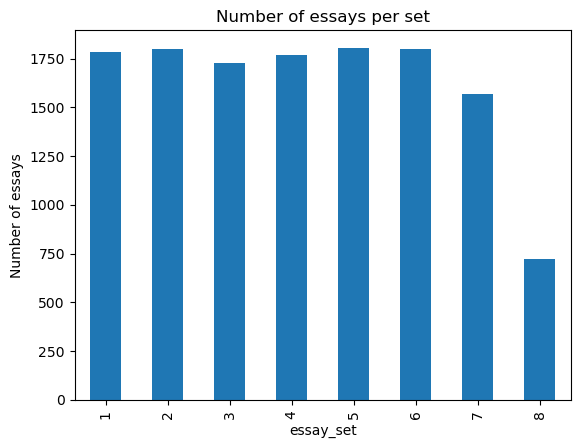

In [115]:
df_train.essay_set.value_counts().sort_index().plot.bar()
plt.title('Number of essays per set')
plt.ylabel('Number of essays')

There is a total of 8 different essay prompts in the dataset. As you can see from the bar graph above it appears that we have a balance distribution of essay sets. The essay sets are also evenly distributed across the training and test set.

In [116]:
df_train['essayLength'] = df_train['essay'].apply(lambda x: len(x.split()))
df_train.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,domain1_score,essayLength
count,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000
mean,10295.395808,4.179485,4.127158,4.137408,6.800247,222.708154
std,6309.074105,2.136913,4.212544,4.264330,8.970705,175.919826
min,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000
25%,4438.750000,2.000000,2.000000,2.000000,2.000000,98.000000
50%,10044.500000,4.000000,3.000000,3.000000,3.000000,163.000000
75%,15681.250000,6.000000,4.000000,4.000000,8.000000,307.000000
max,21633.000000,8.000000,30.000000,30.000000,60.000000,1064.000000


Some insighful analysis of the data using the describe method we are able to identify the following:
```
Average length of essay is 222 words
Average rating for is 4.1, 4.1 and 6.8 for essay 1, 2 and 3 respectively
```
Will the length of the essay have an impact on the rating? Let's find out.

Text(0.5, 1.0, 'Distribution of Essay Length')

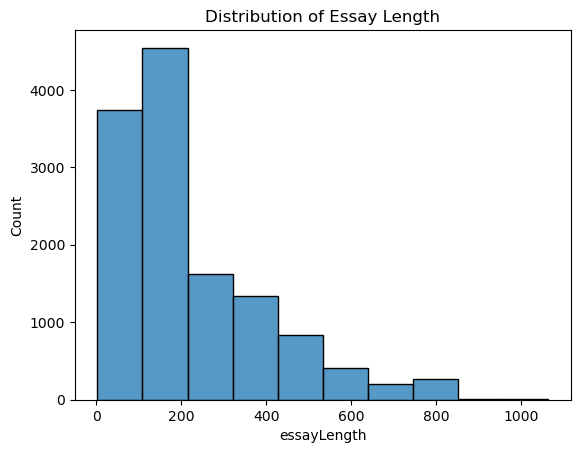

In [117]:
lengthPlot = sns.histplot(df_train['essayLength'], kde=False, bins=10)
plt.title('Distribution of Essay Length')

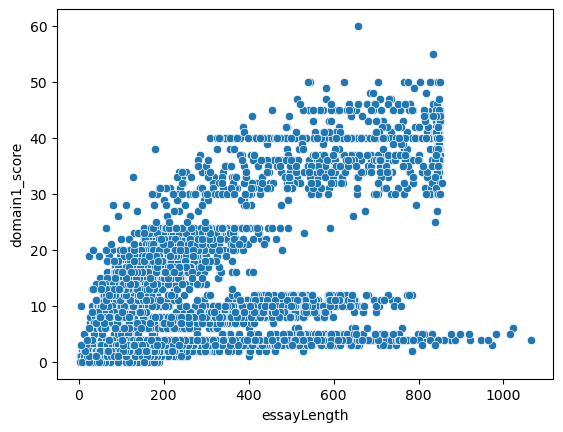

In [118]:
essaylenvscores = sns.scatterplot(x="essayLength", y="domain1_score", data=df_train)

There appears to be some correlation between the length of the essay and the score but it is not as clear as we would like. We will have to try and extract some more features from the essays to see if we can get a better correlation.

<Axes: title={'center': 'Score Distribution'}, xlabel='domain1_score'>

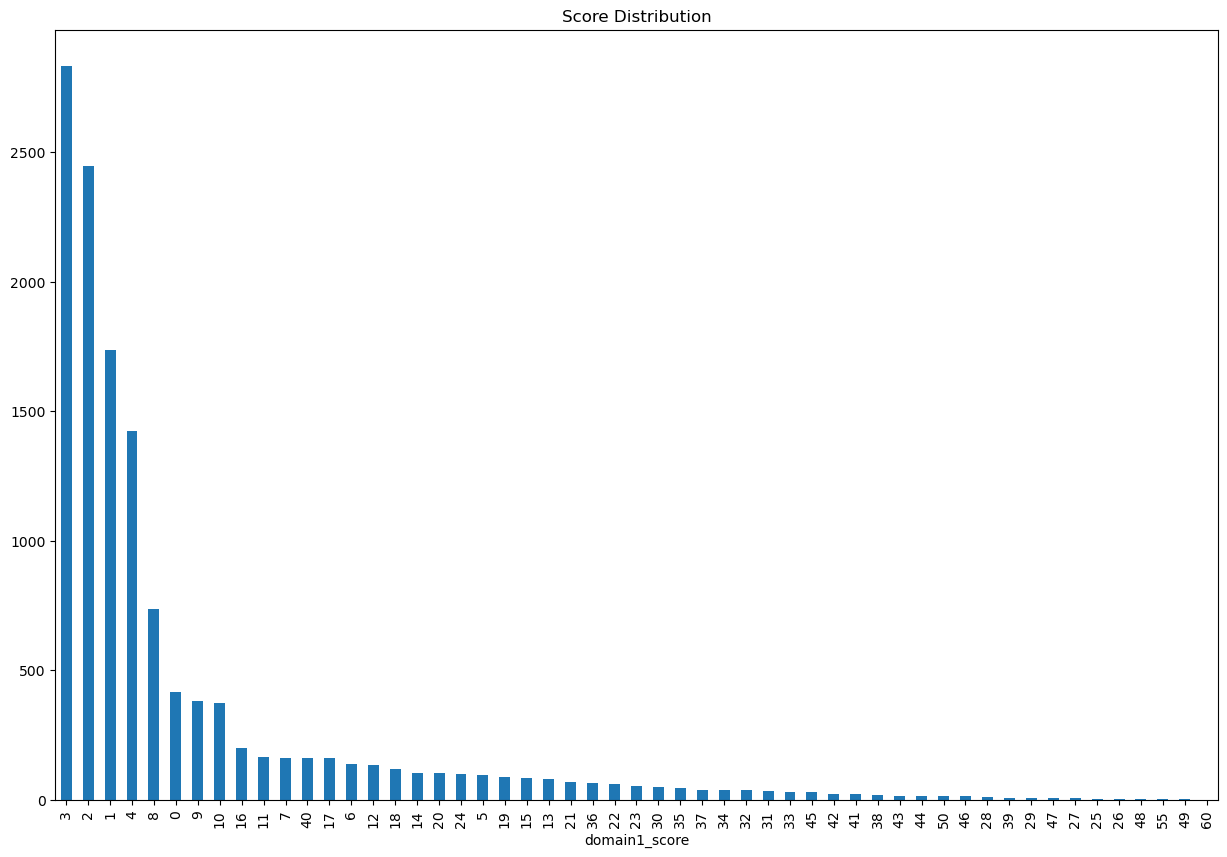

In [119]:
scoreDistribution = df['domain1_score'].value_counts()
scoreDistribution.plot(kind='bar', title='Score Distribution', figsize=(15, 10))

This is a bit alarming because we expect to have a range between 0 and 10. But as you can see from the score distribution that is not the case. We need to explore this further. 

In [120]:
df_train.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score,essayLength
0,1,1,"Dear local newspaper, I think effects computer...",4,4,8,338
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,9,419
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,7,279
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,10,524
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,8,465


In [121]:
df_train.domain1_score.unique()

array([ 8,  9,  7, 10,  6, 12,  4,  3, 11,  2,  5,  1,  0, 15, 13, 17, 23,
       16, 18, 19, 14, 21, 24, 20, 22, 34, 46, 40, 30, 26, 41, 31, 44, 36,
       43, 45, 35, 42, 33, 38, 47, 32, 50, 39, 37, 55, 60, 28, 49, 29, 27,
       25, 48])

### Max Scores for Each Essay Set
- Essay Set 1: 12.0
- Essay Set 2: 6.0
- Essay Set 3: 3.0
- Essay Set 4: 3.0
- Essay Set 5: 4.0
- Essay Set 6: 4.0
- Essay Set 7: 30.0
- Essay Set 8: 60.0

As you can see the grade scale for each essay varies. This is because each essay set is graded differently. For example, essay set 1 is graded on a scale of 1-6, while essay set 7 is graded on a scale of 1-30. This is important to note because it means that we cannot compare the scores of essays across different essay sets. We can only compare the scores of essays within the same essay set. I will need to create a standardized score for each essay set in order to compare the scores of essays across different essay sets.


<Axes: >

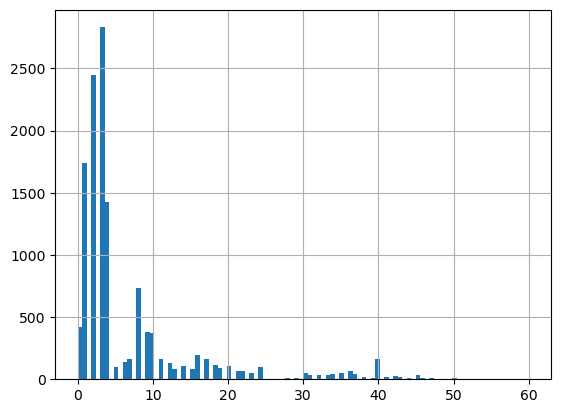

In [124]:
df_train['domain1_score'] = pd.to_numeric(df_train['domain1_score'])

In [126]:
max_scores = df_train.groupby('essay_set')['domain1_score'].max()

def standardize_score(row):
    essay_set = row['essay_set']
    max_score = max_scores[essay_set]
    return row['domain1_score'] / max_score

df_train['standardized_score'] = df_train.apply(standardize_score, axis=1)
df_train.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score,essayLength,essay_idnorm,essay_setnorm,standardized_score
0,1,1,"Dear local newspaper, I think effects computer...",4,4,8,338,0.000046,0.125,0.666667
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,9,419,0.000092,0.125,0.750000
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,7,279,0.000139,0.125,0.583333
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,10,524,0.000185,0.125,0.833333
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,8,465,0.000231,0.125,0.666667


## Validation Set

In [77]:
df_val = pd.read_csv('../raw_data/valid_set.tsv', sep='\t', encoding='ISO-8859-1')
df_val.head()

,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid
0,1788,1,"Dear @ORGANIZATION1, @CAPS1 more and more peop...",1788,NaN
1,1789,1,Dear @LOCATION1 Time @CAPS1 me tell you what I...,1789,NaN
2,1790,1,"Dear Local newspaper, Have you been spending a...",1790,NaN
3,1791,1,"Dear Readers, @CAPS1 you imagine how life woul...",1791,NaN
4,1792,1,"Dear newspaper, I strongly believe that comput...",1792,NaN


In [79]:
df_val.shape

(4218, 5)

In [80]:
df_val.isna().sum()

essay_id                   0
essay_set                  0
essay                      0
domain1_predictionid       0
domain2_predictionid    3618
dtype: int64

In [83]:
df_val.dropna(axis=1, inplace=True)
df_val.shape

(4218, 4)

The column `domain2_predicitonid` has over 80% missing values. It makes sense to omitt this column from the analysis.

## Testing Set

In [75]:
df_test = pd.read_csv('../raw_data/test_set.tsv', sep='\t', encoding='ISO-8859-1')
df_test.head()

,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid
0,2383,1,I believe that computers have a positive effec...,2383,NaN
1,2384,1,"Dear @CAPS1, I know some problems have came up...",2384,NaN
2,2385,1,"Dear to whom it @MONTH1 concern, Computers are...",2385,NaN
3,2386,1,"Dear @CAPS1 @CAPS2, @CAPS3 has come to my atte...",2386,NaN
4,2387,1,"Dear Local newspaper, I think that people have...",2387,NaN


In [69]:
df_test.shape

(4254, 5)

In [70]:
df_test.isna().sum()

essay_id                   0
essay_set                  0
essay                      0
domain1_predictionid       0
domain2_predictionid    3654
dtype: int64

In [71]:
df_test.dropna(axis=1,inplace=True)

Considering how many missing rows `domain2_predictionid` has it made sense to drop it.

In [72]:
df_test.head()

,essay_id,essay_set,essay,domain1_predictionid
0,2383,1,I believe that computers have a positive effec...,2383
1,2384,1,"Dear @CAPS1, I know some problems have came up...",2384
2,2385,1,"Dear to whom it @MONTH1 concern, Computers are...",2385
3,2386,1,"Dear @CAPS1 @CAPS2, @CAPS3 has come to my atte...",2386
4,2387,1,"Dear Local newspaper, I think that people have...",2387


The test set about 25% of the size of the training set. The test set is used to evaluate the model. The test set is only used once, to evaluate the final model.